# Recordando a tarefa de classificação

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data) #dados de entrada
y = pd.DataFrame(iris.target) #classes possíveis


Entrada_treino, Entrada_teste, saidas_esperadas_treino, saidas_esperadas_teste = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 42)




print("Conjunto de treinamento: {}".format(Entrada_treino.shape))
print("Conjunto reservado para testar: {}".format(Entrada_teste.shape))
print("Saídas esperadas no treinamento: {}".format(saidas_esperadas_treino.shape))
print("Saídas esperadas na fase de teste: {}".format(saidas_esperadas_teste.shape))

Conjunto de treinamento: (120, 4)
Conjunto reservado para testar: (30, 4)
Saídas esperadas no treinamento: (120, 1)
Saídas esperadas na fase de teste: (30, 1)


# Recordando como se carrega uma imagem na memória via python

     |████████████████████████████████| 29.2 MB 44.2 MB/s 
     |████████████████████████████████| 1.9 MB 60.0 MB/s 
     |████████████████████████████████| 4.4 MB 63.9 MB/s 
     |████████████████████████████████| 171 kB 74.7 MB/s 
     |████████████████████████████████| 3.3 MB 64.1 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


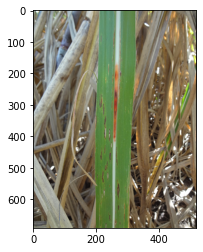

In [ ]:
!pip install scikit-image
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np


figure, axis = plt.subplots()
#imagem = imread('girassol.jpg')
imagem = imread('../imgs/doentes/3.jpg')
axis.imshow(imagem)


#  Detalhando a imagem

In [ ]:

print('Um pixel: ',imagem[0][0]) #um pixel
print('Um pixel: ',imagem.shape) #um pixel


Um pixel:  [148 165 159]
Um pixel:  (691, 518, 3)


# É preciso, então deixar o conjunto de dados que temos em um padrão como aquele que vimos com o dataset iris, acima

In [ ]:
 
img = list(np.asarray(imagem).reshape(-1))
img

[148,
 165,
 159,
 150,
 165,
 160,
 153,
 168,
 163,
 161,
 176,
 171,
 165,
 181,
 178,
 159,
 172,
 165,
 148,
 157,
 140,
 131,
 134,
 105,
 118,
 120,
 96,
 138,
 150,
 150,
 170,
 197,
 208,
 203,
 234,
 237,
 241,
 255,
 255,
 255,
 253,
 255,
 255,
 255,
 255,
 254,
 255,
 255,
 253,
 253,
 241,
 218,
 225,
 145,
 220,
 224,
 139,
 197,
 199,
 133,
 143,
 153,
 116,
 110,
 124,
 125,
 103,
 124,
 141,
 108,
 138,
 172,
 120,
 156,
 190,
 128,
 164,
 200,
 134,
 170,
 206,
 139,
 173,
 201,
 150,
 177,
 196,
 161,
 181,
 190,
 166,
 181,
 186,
 171,
 182,
 186,
 175,
 186,
 182,
 175,
 181,
 177,
 171,
 174,
 167,
 162,
 163,
 155,
 149,
 151,
 140,
 137,
 139,
 126,
 132,
 132,
 120,
 130,
 128,
 115,
 125,
 123,
 108,
 119,
 116,
 99,
 114,
 109,
 90,
 108,
 102,
 88,
 103,
 97,
 85,
 102,
 98,
 87,
 109,
 106,
 99,
 121,
 120,
 118,
 135,
 134,
 132,
 151,
 151,
 149,
 159,
 158,
 156,
 153,
 152,
 150,
 130,
 135,
 113,
 103,
 106,
 85,
 100,
 98,
 86,
 108,
 104,
 103,
 115

# Agora sim.... um classificador inteligente pode ser construído e treinado para reconhecer girassóis

In [ ]:
from sklearn.tree import DecisionTreeClassifier



arvore = DecisionTreeClassifier(random_state=0)
arvore.fit([img],[1]) #treinamento
# no treinamento, o y é inserido com o valor 1 para indicar que a planta é um girassol

DecisionTreeClassifier(random_state=0)

# E predizer...

In [ ]:
arvore.predict([img])

#1 é um girassól

array([1])

# Passo 2:

Neste momento, já conseguimos treinar nosso modelo em árvore para lidar com dados de uma imagem e treinar para reconhecer um girassól.

Mas existem vários fatores que devemos considerar:
* O conjunto de imagens de girassóis é suficiente para garantir que o modelo aprendeu?
* Será que o modelo não se confunde com outra imagem?

#  Vamos, então, treinar o modelo com 2 tipos de flores agora... 
## girassól e rosa

* Mas note que as imagens que pegamos não são de mesma resolução.

Imagem 1:  (691, 518, 3)
Imagem 2:  (720, 498, 3)


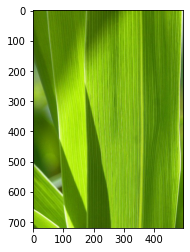

In [ ]:
figure, axis = plt.subplots()
imagem2 = imread('../imgs/saudaveis/cana1.jpg')
axis.imshow(imagem2)

print('Imagem 1: ',imagem.shape) #um pixel
print('Imagem 2: ',imagem2.shape) #um pixel

#img2 = imagem.reshape(-1,2) #-1 indica que a quantidade de linhas não importa.
img2 = list(np.asarray(imagem2).reshape(-1))
 
axis.imshow(imagem2)
plt.show()

#dadosTreinamento = np.concatenate((img, img2), axis=1)
#dadosTreinamento.shape

Vamos redimensionar as imagens para que tenham exatamente o mesmo tamanho e não causem problemas

- Para isso, vamos usar nossa velha conhecida, a Open CV

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Imagem 1:  (400, 600, 3)
Imagem 2:  (400, 600, 3)


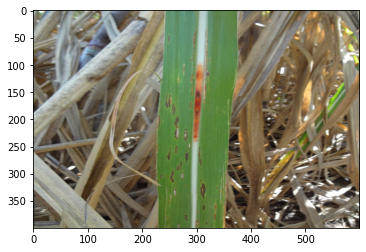

In [ ]:
!pip install opencv-python
import cv2
imagem = cv2.resize(imagem, (600, 400))
imagem2 = cv2.resize(imagem2, (600, 400))



print('Imagem 1: ',imagem.shape) #um pixel
print('Imagem 2: ',imagem2.shape) #um pixel


figure, axis = plt.subplots()
axis.imshow(imagem)
plt.show()


# Agora sim, podemos ter uma base de dados com os valores dos pixels de 2 imagens e teremos 2 saídas:
* 1: Quando a imagem é um girassol
* 2: Quando a imagem é uma rosa


In [ ]:

flores = [[]]
img = list(np.asarray(imagem).reshape(-1))
img2 = list(np.asarray(imagem2).reshape(-1))


saidas_esperadas = [1,2,1,1] #1 é girassol e 2 é rosa

flores =np.array((img, img2,img,img))
flores

array([[147, 164, 157, ...,  84,  75,  61],
       [ 71, 114,   0, ...,  95, 123,   7],
       [147, 164, 157, ...,  84,  75,  61],
       [147, 164, 157, ...,  84,  75,  61]], dtype=uint8)

Treinamento da nossa árvore, agora com 2 imagens:

In [ ]:
arvore = DecisionTreeClassifier(random_state=0)
arvore.fit(flores,saidas_esperadas) #treinamento


DecisionTreeClassifier(random_state=0)

E, por fim, a predição...

In [ ]:

arvore.predict([img2])

array([2])

#  E se a gente testar esse classificador com uma imagem que nunca foi utilizada para treinamento???



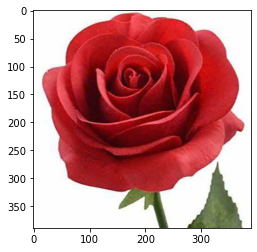

In [ ]:
imagem_teste = imread('rosa2.jpg')
figure, axis = plt.subplots()
axis.imshow(imagem_teste)


In [ ]:
imagem_teste = cv2.resize(imagem_teste, (400, 600))
img_teste = list(np.asarray(imagem_teste).reshape(-1))
#img_teste

In [ ]:

arvore.predict([img_teste])

array([2])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=540ab11d-8365-42e5-985c-2dd0b2989b58' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>